In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import tikzplotlib
import os

import scipy.stats as st

In [2]:
scratchHPC = r'\\rb-hpc.de.bosch.com\hro7rng\scratch\MultiPhase'

In [3]:
StudienOrdner = r'Archive_importand_eval\37_Stresscontrolled_1_2'
StudienOrdner = os.path.join(scratchHPC, StudienOrdner)


ImageOrdner = os.path.join(StudienOrdner, '_image' )

if not os.path.exists(ImageOrdner):
    os.makedirs(ImageOrdner)

In [4]:
lf_csv = r'lifetime_low.csv'
lf_csv = os.path.join(StudienOrdner, lf_csv)

In [5]:
df_lf = pd.read_csv(lf_csv)

In [6]:
ll_volf = df_lf['ModelName'].tolist()
ll_volf = [float(kk[kk.rfind('_')+15:])   for kk in ll_volf]

ll_Seed = df_lf['ModelName'].tolist()
ll_Seed = [str(kk[kk.find('_')+5:kk.find('_Str')])   for kk in ll_Seed]

ll_stress = df_lf['ModelName'].tolist()
ll_stress = [float(kk[kk.find('_Stress')+7:kk.find('_Volu')])   for kk in ll_stress]

In [7]:
minimia_vol = min(ll_volf)
maxima_vol = max(ll_volf)

In [8]:
df_lf['Volume_Martensite'] = ll_volf
df_lf['Seed'] = ll_Seed
df_lf['StressAmp'] = ll_stress


df_wholMod = df_lf[df_lf['Phase']=='wholeMod']

In [9]:
norm = matplotlib.colors.Normalize(vmin=minimia_vol, vmax=maxima_vol, clip=True)
mapper = matplotlib.cm.ScalarMappable(norm=norm) 

In [10]:
from scipy import optimize

def tfunktion(x_data, a,b):
    return a*(x_data**2)+b*x_data+x_data


In [11]:
params, params_covariance = optimize.curve_fit(tfunktion, df_wholMod['Lifetime'].tolist(), df_wholMod['StrainAmplitude'].tolist(),)

In [12]:
df_wholMod

,Unnamed: 0,ModelName,ModelGroup,Lifetime,Phase,_LoadingMode,StrainAmplitude,StrainMean,StressAmplitude,StressMean,FIPmax,FIPmaxLocal,FIPcrit,m_FIP,IsExperimentalData,Volume_Martensite,Seed,StressAmp
0,0.0,DisTest_Seed78333_Stress750_VolumeFraction80,ALL,4051.499821,wholeMod,0.0,0.005456,1.037500e-05,750.0,0.0,0.015116,0.038005,1.870093,1.724138,0,80.0,78333,750.0
3,1.0,DisTest_Seed81296_Stress500_VolumeFraction85,ALL,39622.686508,wholeMod,0.0,0.002637,1.300000e-06,500.0,0.0,0.004028,0.007078,1.870093,1.724138,0,85.0,81296,500.0
6,2.0,DisTest_Seed54667_Stress750_VolumeFraction95,ALL,7238.445331,wholeMod,0.0,0.005399,3.140000e-06,750.0,0.0,0.014555,0.032113,2.521240,1.724138,0,95.0,54667,750.0
9,3.0,DisTest_Seed71034_Stress750_VolumeFraction85,ALL,10097.418057,wholeMod,0.0,0.005457,7.630000e-06,750.0,0.0,0.012000,0.044342,2.521240,1.724138,0,85.0,71034,750.0
12,4.0,DisTest_Seed78333_Stress750_VolumeFraction90,ALL,4186.298864,wholeMod,0.0,0.005424,5.455000e-06,750.0,0.0,0.014832,0.038718,1.870093,1.724138,0,90.0,78333,750.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
589,35.0,DisTest_Seed78333_Stress500_VolumeFraction100,ALL,50312.700133,wholeMod,0.0,0.002619,5.250000e-07,500.0,0.0,0.003507,0.006266,1.870093,1.724138,0,100.0,78333,500.0
591,36.0,DisTest_Seed45213_Stress600_VolumeFraction100,ALL,17694.014988,wholeMod,0.0,0.003619,4.050000e-07,600.0,0.0,0.006429,0.012364,1.870093,1.724138,0,100.0,45213,600.0
593,37.0,DisTest_Seed78333_Stress750_VolumeFraction100,ALL,4200.363611,wholeMod,0.0,0.005374,1.525000e-06,750.0,0.0,0.014803,0.022256,1.870093,1.724138,0,100.0,78333,750.0
595,38.0,DisTest_Seed93426_Stress500_VolumeFraction100,ALL,158429.736424,wholeMod,0.0,0.002606,5.300000e-07,500.0,0.0,0.001803,0.007249,1.870093,1.724138,0,100.0,93426,500.0


In [13]:
colorswhole = df_wholMod['Volume_Martensite'].tolist()
un_voll = np.unique(colorswhole)
colorswhole = [float(c) for c in colorswhole]

strain_ll = np.unique(df_wholMod['StressAmp'].tolist())

dic_f_curve = {}
for  vol in un_voll:
    df_red = df_wholMod[df_wholMod['Volume_Martensite']==vol]
    params, params_covariance = optimize.curve_fit(tfunktion, df_red['Lifetime'].tolist(), df_red['StressAmp'].tolist())
    
    ll_mean_lifetimes = [np.min(df_red[df_red['StressAmp']==stra]['Lifetime'].tolist()) for stra in strain_ll]
    print(ll_mean_lifetimes)
    f_curve = [tfunktion(lf, params[0], params[1]) for lf in ll_mean_lifetimes]
    dic_f_curve[vol] = f_curve

print(dic_f_curve)

ValueError: zero-size array to reduction operation minimum which has no identity

In [ ]:

plt.scatter(df_wholMod['Lifetime'], df_wholMod['StressAmp'], c=colorswhole)
cbar = plt.colorbar(mapper)
cbar.set_label('Volume Fraction of Martensite in %')
plt.xscale('log')
plt.title('Crack Initiiation Whole Model')
plt.xlabel('Number of Cycles')
plt.ylabel('Strain')
#plt.show()

tikzplotlib.save(os.path.join(ImageOrdner, 'ScatterLifetimeWholeMod.tex'))
plt.savefig(os.path.join(ImageOrdner, 'ScatterLifetimeWholeMod.png'), bbox_inches='tight', dpi=150, transparent=True)

In [14]:
df_Ferrite = df_lf[df_lf['Phase']=='Ferrite']

In [15]:
colorsFerr = df_Ferrite['Volume_Martensite'].tolist()
colorsFerr = [float(c) for c in colorsFerr]

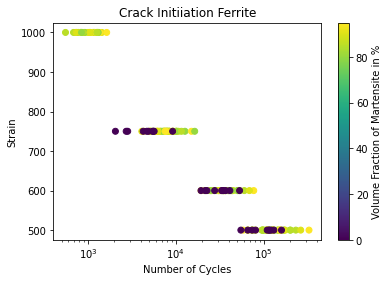

In [16]:
plt.scatter(df_Ferrite['Lifetime'], df_Ferrite['StressAmp'], c=colorsFerr)
cbar = plt.colorbar()
cbar.set_label('Volume Fraction of Martensite in %')
plt.xscale('log')
plt.title('Crack Initiiation Ferrite')
plt.xlabel('Number of Cycles')
plt.ylabel('Strain')
plt.show()

In [17]:
df_mart = df_lf[df_lf['Phase']=='Martensite']

In [18]:
colorsMart = df_mart['Volume_Martensite'].tolist()
colorsMart = [int(c) for c in colorsMart]

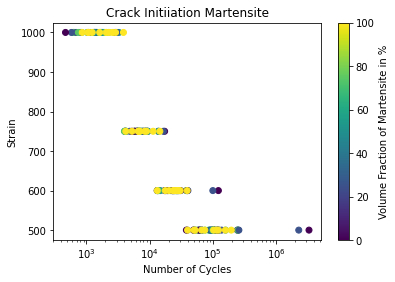

In [19]:
plt.scatter(df_mart['Lifetime'], df_mart['StressAmp'], c=colorsMart)
cbar = plt.colorbar(mapper)
cbar.set_label('Volume Fraction of Martensite in %')
plt.xscale('log')
plt.title('Crack Initiiation Martensite')
plt.xlabel('Number of Cycles')
plt.ylabel('Strain')
plt.show()

Abwärts erstelle confidence intervalle

In [20]:
strainll = np.unique(df_wholMod['StressAmp'].tolist())
dic_df_conf = {}
ch_df = {'whole': df_wholMod, 'Ferrite': df_Ferrite, 'Martensite': df_mart}
dd_ll = ['whole','Ferrite','Martensite']
for dd in dd_ll:
    df_conf = pd.DataFrame({'StressAmp': strainll})
    for vols in np.unique(ll_volf):
        mean = []
        l_bound= []
        u_bound =  []
        for strain in strainll:
            rdf = ch_df[dd][ch_df[dd]['Volume_Martensite'] == vols]
            rdf = rdf[rdf['StressAmp'] == strain]
            a = rdf['Lifetime'].tolist()
            if len(a) != 0:
                s_mean = np.mean(a)
                sl_bound, su_bound = st.t.interval(0.95, len(a)-1, loc=np.mean(a), scale=st.sem(a))
                if sl_bound<0:
                    sl_bound = min(a)
            if len(a) == 0:
                s_mean,sl_bound, su_bound = np.NaN,np.NaN,np.NaN

            mean.append(s_mean), l_bound.append(sl_bound), u_bound.append(su_bound)
        df_conf['l_bound VolF '+ str(vols)] = l_bound
        df_conf['mean VolF '+ str(vols)] = mean
        df_conf['u_bound VolF '+ str(vols)] = u_bound
    dic_df_conf[dd] = df_conf

Plotten der confidence Intervalle

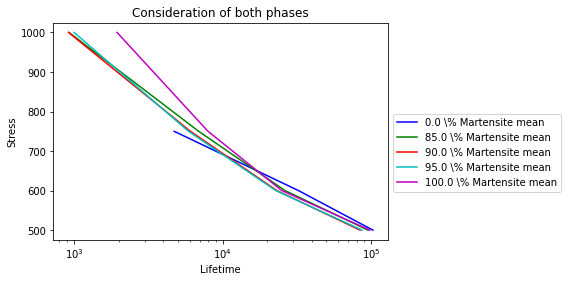

In [21]:
colorlist = ['b', 'g', 'r', 'c', 'm', 'y']
df_conf = dic_df_conf['whole']
volfll = [kk for kk in np.unique(ll_volf) if kk != 80.]
for num, vols in enumerate(np.unique(volfll)):

    plt.plot(df_conf['mean VolF ' + str(vols)],df_conf['StressAmp'], label= (str(vols)+' \% Martensite mean'), color=colorlist[num])
    #plt.fill_betweenx(df_conf['StrainAmplitude'], df_conf['l_bound VolF ' + str(vols)], df_conf['u_bound VolF ' + str(vols)], color=colorlist[num], alpha=.2, label=' confidence interval 95\%')
plt.xscale('log')
plt.legend(loc= 'lower left',bbox_to_anchor=(1.0, 0.2))#, ncol=2 )

plt.ylabel('Stress')
plt.xlabel('Lifetime')

plt.title('Consideration of both phases')


tikzplotlib.save(os.path.join(ImageOrdner, 'ConfLifetimeWholeMod.tex'))
plt.savefig(os.path.join(ImageOrdner, 'ConfLifetimeWholeMod.png'), bbox_inches='tight', dpi=150, transparent=True)

[0.0, 85.0, 90.0, 95.0]


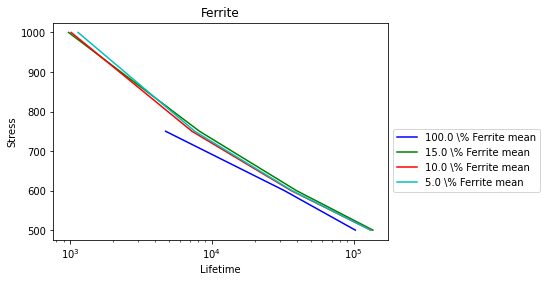

In [22]:
colorlist = ['b', 'g', 'r', 'c', 'm', 'y']
df_conf = dic_df_conf['Ferrite']
volls_red = []
#for num, vols in enumerate(np.unique(ll_volf)):
#    if vols in [95.0, 85.0,75.0]:
#        volls_red.append(vols)
vol_wo_mar = [kk for kk in np.unique(ll_volf) if kk not in [100., 80.]]
print(vol_wo_mar)
for num, vols in enumerate(vol_wo_mar):
    plt.plot(df_conf['mean VolF ' + str(vols)],df_conf['StressAmp'], label= (str(100-vols)+' \% Ferrite mean'), color=colorlist[num])
    #plt.fill_betweenx(df_conf['StrainAmplitude'], df_conf['l_bound VolF ' + str(vols)], df_conf['u_bound VolF ' + str(vols)], color=colorlist[num], alpha=.2, label=' confidence interval 95\%')
plt.xscale('log')
plt.legend(loc= 'lower left',bbox_to_anchor=(1.0, 0.2))#, ncol=2 )

plt.ylabel('Stress')
plt.xlabel('Lifetime')
plt.title('Ferrite')


tikzplotlib.save(os.path.join(ImageOrdner, 'ConfLifetimeFerrite.tex'))

plt.savefig(os.path.join(ImageOrdner, 'ConfLifetimeFerrite.png'), bbox_inches='tight', dpi=150, transparent=True)

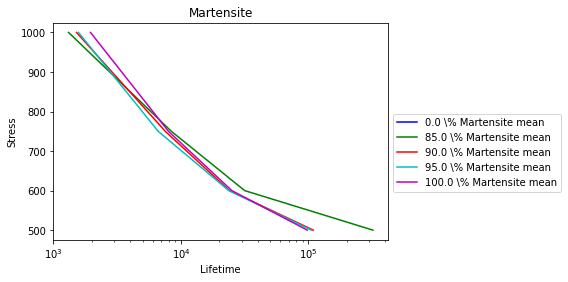

In [23]:
colorlist = ['b', 'g', 'r', 'c', 'm', 'y']
df_conf = dic_df_conf['Martensite']
volls_red = []
#for num, vols in enumerate(np.unique(ll_volf)):
#    if vols in [100.0, 95.0 ,85.0 ,75.0]:
#        volls_red.append(vols)
    
for num, vols in enumerate(np.unique(volfll)):
    plt.plot(df_conf['mean VolF ' + str(vols)],df_conf['StressAmp'], label= (str(vols)+' \% Martensite mean'), color=colorlist[num])
    #plt.fill_betweenx(df_conf['StrainAmplitude'], df_conf['l_bound VolF ' + str(vols)], df_conf['u_bound VolF ' + str(vols)], color=colorlist[num], alpha=.2, label=' confidence interval 95\%')
plt.xscale('log')
plt.legend(loc = 'lower left',bbox_to_anchor=(1.0, 0.2))#, ncol=2 )

plt.title('Martensite')
plt.ylabel('Stress')
plt.xlabel('Lifetime')

tikzplotlib.save(os.path.join(ImageOrdner, 'ConfLifetimeMartensite.tex'))

plt.savefig(os.path.join(ImageOrdner, 'ConfLifetimeMartensite.png'), bbox_inches='tight', dpi=150, transparent=True)

Boxplotvarainte der Woehlerkurve

In [24]:
ImageBoxplots = os.path.join(ImageOrdner, 'Boxplots' )

if not os.path.exists(ImageBoxplots):
    os.makedirs(ImageBoxplots)

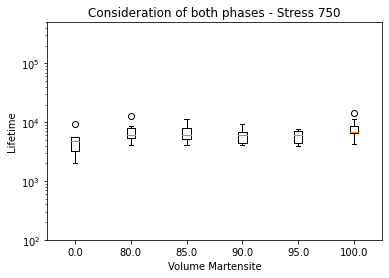

In [25]:
un_stress = np.unique(ll_stress)
stress = 750.0
ticklist = []
positions = [kk+1 for kk in range(len(un_voll))]
df_whole_bp = df_wholMod[df_wholMod['StressAmp']==stress]
for num, vols in enumerate(un_voll):
    bp = plt.boxplot(df_whole_bp[df_whole_bp['Volume_Martensite']==vols]['Lifetime'], positions=[num+1] )
    
    #ticklist.append(np.mean(positions))
    #positions = [kk+1+len(positions) for kk in positions]
    
xlabel = [str(kk) for kk in un_voll]
ticklist = [num +1 for num,kk in enumerate(un_voll)]
plt.xticks(ticklist, xlabel)

plt.ylabel('Lifetime')
plt.xlabel('Volume Martensite')
plt.title(f'Consideration of both phases - Stress {str(int(stress))}')
plt.yscale('log')
plt.ylim(10**2, 5*10**5)
tikzplotlib.save(os.path.join(ImageBoxplots, f'Whole_{str(int(stress))}_Life_over_Vol_Box_sameY.tex'))

plt.savefig(os.path.join(ImageBoxplots, f'Whole_{str(int(stress))}_Life_over_Vol_Box_sameY.png'), bbox_inches='tight', dpi=150, transparent=True)

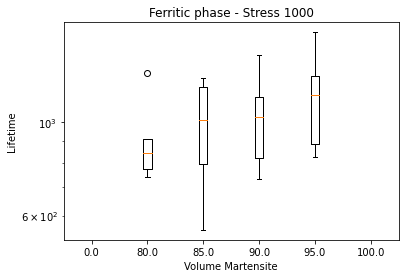

In [26]:
un_stress = np.unique(ll_stress)
stress = 1000.0
ticklist = []
positions = [kk+1 for kk in range(len(un_voll))]
df_whole_bp = df_Ferrite[df_Ferrite['StressAmp']==stress]
for num, vols in enumerate(un_voll):
    bp = plt.boxplot(df_whole_bp[df_whole_bp['Volume_Martensite']==vols]['Lifetime'], positions=[num+1] )
    
    #ticklist.append(np.mean(positions))
    #positions = [kk+1+len(positions) for kk in positions]
    
xlabel = [str(kk) for kk in un_voll]
ticklist = [num +1 for num,kk in enumerate(un_voll)]
plt.xticks(ticklist, xlabel)

plt.ylabel('Lifetime')
plt.xlabel('Volume Martensite')
plt.title(f'Ferritic phase - Stress {str(int(stress))}')
plt.yscale('log')
#plt.ylim(10**2, 5*10**5)
tikzplotlib.save(os.path.join(ImageBoxplots, f'Ferrite_{str(int(stress))}_Life_over_Vol_Box.tex'))

plt.savefig(os.path.join(ImageBoxplots, f'Ferrite_{str(int(stress))}_Life_over_Vol_Box.png'), bbox_inches='tight', dpi=150, transparent=True)

In [27]:
### AChtung lower bound ist nicht ganz korrekt das dieser durch die große varianz eine negative Lebensdauer angeben würde
### dacher ist in diesen Fällen der Lower Bound = minimum der Lebenszeit für definierte Dehnung und Volumengehalt

In [28]:
mnbv= df_lf[df_lf['StressAmp']==1000.0]
mnbv= mnbv[mnbv['Seed']=='93426']
mnbv[mnbv['Volume_Martensite'].isin([95.0,75.0])]

,Unnamed: 0,ModelName,ModelGroup,Lifetime,Phase,_LoadingMode,StrainAmplitude,StrainMean,StressAmplitude,StressMean,FIPmax,FIPmaxLocal,FIPcrit,m_FIP,IsExperimentalData,Volume_Martensite,Seed,StressAmp
393,51.0,DisTest_Seed93426_Stress1000_VolumeFraction95,ALL,837.744114,wholeMod,0.0,0.009216,0.000075,999.995,0.0,0.050840,0.110972,2.521240,1.724138,0,95.0,93426,1000.0
394,51.1,DisTest_Seed93426_Stress1000_VolumeFraction95,ALL,1482.185312,Martensite,0.0,0.009216,0.000075,999.995,0.0,0.027086,0.084573,1.870093,1.724138,0,95.0,93426,1000.0
395,51.2,DisTest_Seed93426_Stress1000_VolumeFraction95,ALL,837.744114,Ferrite,0.0,0.009216,0.000075,999.995,0.0,0.050840,0.110972,2.521240,1.724138,0,95.0,93426,1000.0


Bestimme liegt geringste Lebenszeit immer mit Ferrit zusammen? 

In [29]:
#df_lf
ll_model = df_lf['Unnamed: 0'].tolist()

In [30]:
ll_prob_phase = []
for mod in ll_model:
    if mod%1 == 0:
        ltime = df_lf[df_lf['Unnamed: 0'] == mod]['Lifetime']
        
        phases = [g for g in ll_model if int(mod) == int(g) and g!=mod]
        
        for ph in phases:
            if float(df_lf[df_lf['Unnamed: 0'] == ph]['Lifetime']) == float(ltime):
                ll_prob_phase.append([len(phases),df_lf[df_lf['Unnamed: 0'] == ph]['Phase'].values[0]])        

print(np.unique(ll_prob_phase,axis=0))

TypeError: cannot convert the series to <class 'float'>

In [31]:
ll_prob_phase = []
for mod in ll_model:
    if mod%1 == 0:
        ltime = df_lf[df_lf['Unnamed: 0'] == mod]['Lifetime']
        
        phases = [g for g in ll_model if int(mod) == int(g) and g!=mod]
        ltime = 9e300
        phaseprob = ''
        for ph in phases:
            if float(df_lf[df_lf['Unnamed: 0'] == ph]['Lifetime']) < ltime:
                ltime = float(df_lf[df_lf['Unnamed: 0'] == ph]['Lifetime'])
                phaseprob = df_lf[df_lf['Unnamed: 0'] == ph]['Phase'].values[0]
        ll_prob_phase.append([len(phases),phaseprob])        

print(np.unique(ll_prob_phase,axis=0))

TypeError: cannot convert the series to <class 'float'>

In [32]:
strainll = np.unique(df_wholMod['StressAmp'].tolist())
dic_df_StressAmp = {}
ch_df = {'whole': df_wholMod, 'Ferrite': df_Ferrite, 'Martensite': df_mart}
dd_ll = ['whole','Ferrite','Martensite']
for dd in dd_ll:
    df_conf = pd.DataFrame({'StressAmp': strainll})
    for vols in np.unique(ll_volf):
        mean = []
        l_bound= []
        u_bound =  []
        for strain in strainll:
            rdf = ch_df[dd][ch_df[dd]['Volume_Martensite'] == vols] 
            rdf = rdf[rdf['StressAmp'] == strain]
            a = rdf['StrainAmplitude'].tolist()
           
            if len(a) != 0:
                s_mean = np.mean(a)
                sl_bound, su_bound = st.t.interval(0.95, len(a)-1, loc=np.mean(a), scale=st.sem(a))
                if sl_bound<0:
                    sl_bound = min(a)
            if len(a) == 0:
                s_mean,sl_bound, su_bound = np.NaN,np.NaN,np.NaN

            mean.append(s_mean), l_bound.append(sl_bound), u_bound.append(su_bound)
        df_conf['l_bound VolF '+ str(vols)] = l_bound
        df_conf['mean VolF '+ str(vols)] = mean
        df_conf['u_bound VolF '+ str(vols)] = u_bound
    dic_df_StressAmp[dd] = df_conf

Plotten confidence Intervalle bezogen auf Stress::

In [33]:
dic_df_StressAmp['whole']

,StressAmp,l_bound VolF 0.0,mean VolF 0.0,u_bound VolF 0.0,l_bound VolF 80.0,mean VolF 80.0,u_bound VolF 80.0,l_bound VolF 85.0,mean VolF 85.0,u_bound VolF 85.0,l_bound VolF 90.0,mean VolF 90.0,u_bound VolF 90.0,l_bound VolF 95.0,mean VolF 95.0,u_bound VolF 95.0,l_bound VolF 100.0,mean VolF 100.0,u_bound VolF 100.0
0,500.0,0.002739,0.002744,0.002749,0.002634,0.002639,0.002645,0.002629,0.002634,0.002640,0.002623,0.002629,0.002635,0.002618,0.002625,0.002631,0.002610,0.002615,0.002620
1,600.0,0.003713,0.003719,0.003726,0.003622,0.003628,0.003634,0.003617,0.003624,0.003631,0.003613,0.003622,0.003630,0.003608,0.003619,0.003629,0.003600,0.003607,0.003615
2,750.0,0.006057,0.006106,0.006154,0.005445,0.005454,0.005463,0.005427,0.005438,0.005448,0.005409,0.005422,0.005435,0.005390,0.005406,0.005422,0.005364,0.005373,0.005382
3,1000.0,NaN,NaN,NaN,0.010231,0.010351,0.010471,0.009884,0.009973,0.010062,0.009547,0.009605,0.009663,0.009233,0.009285,0.009337,0.008938,0.008967,0.008996


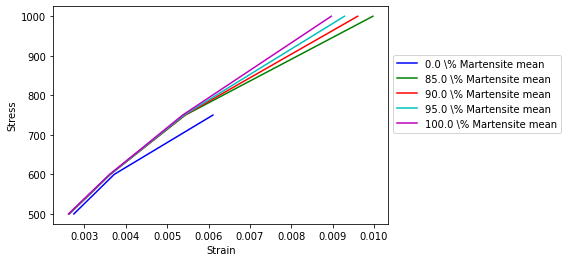

In [35]:
colorlist = ['b', 'g', 'r', 'c', 'm', 'y']

df_conf = dic_df_StressAmp['whole']
for num, vols in enumerate(np.unique(volfll)):
    plt.plot(df_conf['mean VolF ' + str(vols)],df_conf['StressAmp'], label= (str(vols)+' \% Martensite mean'), color=colorlist[num])
    #plt.fill_betweenx(df_conf['StrainAmplitude'], df_conf['l_bound VolF ' + str(vols)], df_conf['u_bound VolF ' + str(vols)], color=colorlist[num], alpha=.2, label=' confidence interval 95\%')
#plt.xscale('log')
plt.legend(bbox_to_anchor=(1.0, 0.8), ncol=1 )

plt.ylabel('Stress')
plt.xlabel('Strain')
plt.title('')

tikzplotlib.save(os.path.join(ImageOrdner, 'StressAmplitude.tex'))

plt.savefig(os.path.join(ImageOrdner, 'StressAmplitude.png'), bbox_inches='tight', dpi=150, transparent=True)

In [33]:
df_conf

,StressAmp,l_bound VolF 0.0,mean VolF 0.0,u_bound VolF 0.0,l_bound VolF 80.0,mean VolF 80.0,u_bound VolF 80.0,l_bound VolF 85.0,mean VolF 85.0,u_bound VolF 85.0,l_bound VolF 90.0,mean VolF 90.0,u_bound VolF 90.0,l_bound VolF 95.0,mean VolF 95.0,u_bound VolF 95.0,l_bound VolF 100.0,mean VolF 100.0,u_bound VolF 100.0
0,500.0,NaN,NaN,NaN,38205.628887,424017.809964,1.156612e+06,39622.686508,320581.724664,818937.172462,67638.178943,109250.212848,150862.246753,66104.138796,105597.840281,145091.541765,61402.448495,97935.503931,134468.559367
1,600.0,NaN,NaN,NaN,11501.640832,34326.522776,5.715140e+04,13551.453049,31592.688825,49633.924601,18654.167763,23971.116534,29288.065305,18582.939451,23742.606205,28902.272958,19875.707835,25046.371453,30217.035072
2,750.0,NaN,NaN,NaN,4996.086624,7661.117204,1.032615e+04,5576.762322,8405.063410,11233.364498,5548.589051,7530.006217,9511.423383,5492.758898,6622.447897,7752.136896,5807.429091,7977.617600,10147.806108
3,1000.0,NaN,NaN,NaN,335.465288,1440.247515,2.545030e+03,669.483285,1312.511950,1955.540615,962.594904,1515.463608,2068.332312,1082.082667,1570.562767,2059.042868,1259.756985,1950.946898,2642.136812
